<a href="https://colab.research.google.com/github/gyunini/DeepLearning_From_Scratch/blob/main/%EB%B0%91%EC%8B%9C%EB%94%A5ch05_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오차역전법 구현하기

In [2]:
# 곱셈계층

class MulLayer:
    def __init__(self): # 순선파 시의 입력값을 유지하기 위해 사용
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y  # x와 y를 바꾼다.
        dy = dout * self.x

        return dx, dy

In [3]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)

price: 220
dApple: 2.2
dApple_num: 110
dTax: 200


In [4]:
# 덧셈계층

class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

In [5]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


- Relu 계층 구현

In [6]:
import numpy as np

class Relu:
  def __init__(self):
    self.mask = None

  def forward(self, x):
    self.mask = (x <= 0) # mask는 True/False로 구성된 넘파이배열
    out = x.copy()
    out[self.mask] = 0 # 0보다 작은 원소 (True)인 것들을 0으로 바꿈

    return out

  def backward(self, dout):
    dout[self.mask] = 0 # 역전파 때는 0보다 크면 그대로 흘리고 0보다 작으면 0으로 됨. -> 0보다 작은 원소 (True)인 것들을 0으로 바꿈
    dx = dout

    return dx

In [7]:
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

mask = (x <= 0) # 넘파이 배열과 대소비교를 하면 T/F로 이루어진 배열이 나옴
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


- Sigmoid 계층 구현

In [8]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * self.out * (1.0 - self.out) # y*(1-y) * dL/dY

        return dx

- Affine 계층 : 행렬의 곱을 수행하는 계층

In [9]:
X = np.random.rand(2) #  입력
W = np.random.rand(2,3) # 가중치
B = np.random.rand(3) # 편향

print(X.shape)
print(W.shape)
print(B.shape)

Y = np.dot(X, W) + B
print(Y)

(2,)
(2, 3)
(3,)
[1.18911147 1.59512297 0.26546468]


- Affine 계층에서의 역전파 계산그래프는 행렬 미분 참고 (배치용)

In [10]:
X_dot_W = np.array([[0,0,0], [10,10,10]])
B = np.array([1,2,3])
print(X_dot_W)

print(X_dot_W + B) # Broadcasting

[[ 0  0  0]
 [10 10 10]]
[[ 1  2  3]
 [11 12 13]]


In [11]:
dY = np.array([[1,2,3], [4,5,6]])
print(dY)

dB = np.sum(dY, axis=0)
print(dB)

[[1 2 3]
 [4 5 6]]
[5 7 9]


In [12]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        return dx

In [13]:
# 입력 데이터가 텐서(4차원 데이터) 인 경우도 고려
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b

        self.x = None
        self.original_x_shape = None
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1) # 이차원으로 reshape
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx

# Softmax with Loss 계층 구현**

In [14]:
def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.max(x, axis=0)
    y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y.T

  x = x - np.max(x) # 오버플로 대책
  return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
  if t.size == y.size:
    t = t.argmax(axis=1)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad

In [15]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실함수
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 인코딩 형태)

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size

        return dx

In [16]:
import numpy as np
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import sys, os
sys.path.append('/content/drive/MyDrive/Colab Notebooks/2023_AI')
sys.path.extend("./")
from mnist import load_mnist

In [19]:
import numpy as np

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:3.892354144537532e-10
b1:2.5626972098067677e-09
W2:5.634684635391301e-09
b2:1.3942213170636819e-07


- 오차역전법 학습시키기

In [20]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)

    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.1048 0.1049
0.90465 0.9096
0.9250166666666667 0.9256
0.9367833333333333 0.9367
0.9464333333333333 0.9453
0.952 0.95
0.95595 0.9533
0.9616666666666667 0.9596
0.9640166666666666 0.9596
0.9672333333333333 0.9632
0.96975 0.9648
0.9718166666666667 0.9643
0.9728 0.9653
0.9742333333333333 0.9679
0.9760833333333333 0.967
0.97715 0.9698
0.9787333333333333 0.9699


# Ch06 - 학습 관련 기술들

In [21]:
class SGD:
  def __init__(self, lr = 0.01):
    self.lr = lr

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

'''
optimizer = SGD()
optimizer.update(params, grads) 이런식으로 수행
'''

'\noptimizer = SGD()\noptimizer.update(params, grads) 이런식으로 수행\n'

In [22]:
class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None

  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)

    for key in params.keys():
      self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
      params[key] += self.v[key]

- learning rate decay(학습률 감소)

In [23]:
class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val) # 초기화

        for key in params.keys():
            self.h[key] += grads[key] * grads[key] # 기울기 제곱, h라는 새로운 변수
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 작은 값 더해서 0으로 나누는 것 방지

In [24]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)

        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])

            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

In [25]:
class MultiLayerNet:
    """완전연결 다층 신경망

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    weight_decay_lambda : 가중치 감소(L2 법칙)의 세기
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.weight_decay_lambda = weight_decay_lambda
        self.params = {}

        # 가중치 초기화
        self.__init_weight(weight_init_std)

        # 계층 생성
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
            self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """가중치 초기화

        Parameters
        ----------
        weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
            'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
            'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLU를 사용할 때의 권장 초깃값
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoid를 사용할 때의 권장 초깃값
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        손실 함수의 값
        """
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        """기울기를 구한다(수치 미분).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grads

In [26]:
def smooth_curve(x):
    """손실 함수의 그래프를 매끄럽게 하기 위해 사용

    참고：http://glowingpython.blogspot.jp/2012/02/convolution-with-numpy.html
    """
    window_len = 11
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    w = np.kaiser(window_len, 2)
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[5:len(y)-5]

===========iteration:0===========
SGD:2.345162735936939
Momentum:2.3426790000810023
AdaGrad:2.0490936450621846
Adam:2.31803714625302
===========iteration:100===========
SGD:1.5741740668759767
Momentum:0.3938048027546067
AdaGrad:0.11809105511798938
Adam:0.2898064430537236
===========iteration:200===========
SGD:0.7216490310239527
Momentum:0.3013533670410739
AdaGrad:0.08623461955973073
Adam:0.24118144352221743
===========iteration:300===========
SGD:0.5233247330934753
Momentum:0.17247514862387625
AdaGrad:0.09266713246380773
Adam:0.15306261950541958
===========iteration:400===========
SGD:0.4329789453580812
Momentum:0.17562994058263878
AdaGrad:0.052644413128312174
Adam:0.13656480670738952
===========iteration:500===========
SGD:0.39631025967708045
Momentum:0.12246180712892
AdaGrad:0.03253972347180287
Adam:0.07105410874128076
===========iteration:600===========
SGD:0.29553482073508164
Momentum:0.07348650295959644
AdaGrad:0.030469876376155232
Adam:0.02665922318789315
===========iteration:70

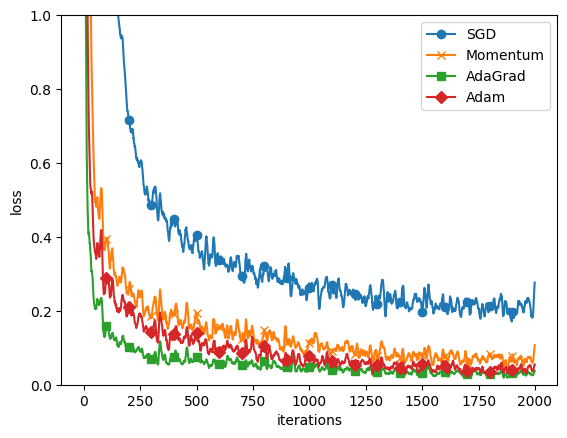

In [27]:
import matplotlib.pyplot as plt

# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

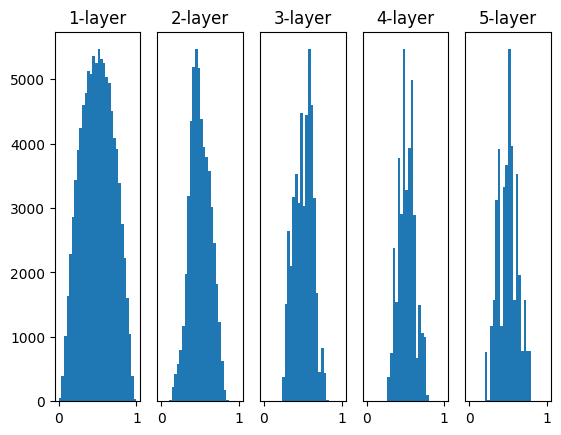

In [28]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.3025533788106936
Xavier:2.3044163012505567
He:2.3458022196222568
===========iteration:100===========
std=0.01:2.3016783142244766
Xavier:2.239084915826269
He:1.3448671562372305
===========iteration:200===========
std=0.01:2.302235316675599
Xavier:2.0942004782114028
He:0.8306872890022499
===========iteration:300===========
std=0.01:2.3028265190324007
Xavier:1.8119630557118387
He:0.5767771391608993
===========iteration:400===========
std=0.01:2.3024879711290587
Xavier:1.2549937948113317
He:0.4050747858032462
===========iteration:500===========
std=0.01:2.301543694545704
Xavier:0.8839754864056559
He:0.39867211817237125
===========iteration:600===========
std=0.01:2.299270648186339
Xavier:0.7016128775233963
He:0.3726684206300613
===========iteration:700===========
std=0.01:2.3044416690235936
Xavier:0.5781032482963826
He:0.33181163882634723
===========iteration:800===========
std=0.01:2.2994406354912513
Xavier:0.45091410408733473
He:0.303927713756

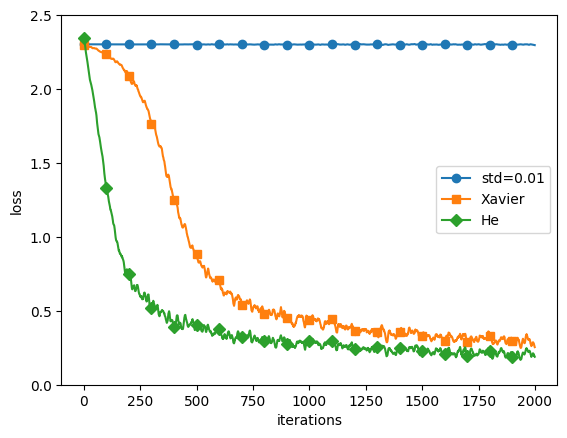

In [29]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

In [32]:
class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # 합성곱 계층은 4차원, 완전연결 계층은 2차원

        # 시험할 때 사용할 평균과 분산
        self.running_mean = running_mean
        self.running_var = running_var

        # backward 시에 사용할 중간 데이터
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)

        return out.reshape(*self.input_shape)

    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)

        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std

            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))

        out = self.gamma * xn + self.beta
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size

        self.dgamma = dgamma
        self.dbeta = dbeta

        return dx

In [33]:
class MultiLayerNetExtend:
    """완전 연결 다층 신경망(확장판)
    가중치 감소, 드롭아웃, 배치 정규화 구현

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    weight_decay_lambda : 가중치 감소(L2 법칙)의 세기
    use_dropout : 드롭아웃 사용 여부
    dropout_ration : 드롭아웃 비율
    use_batchNorm : 배치 정규화 사용 여부
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0,
                 use_dropout = False, dropout_ration = 0.5, use_batchnorm=False):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.use_dropout = use_dropout
        self.weight_decay_lambda = weight_decay_lambda
        self.use_batchnorm = use_batchnorm
        self.params = {}

        # 가중치 초기화
        self.__init_weight(weight_init_std)

        # 계층 생성
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            if self.use_batchnorm:
                self.params['gamma' + str(idx)] = np.ones(hidden_size_list[idx-1])
                self.params['beta' + str(idx)] = np.zeros(hidden_size_list[idx-1])
                self.layers['BatchNorm' + str(idx)] = BatchNormalization(self.params['gamma' + str(idx)], self.params['beta' + str(idx)])

            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

            if self.use_dropout:
                self.layers['Dropout' + str(idx)] = Dropout(dropout_ration)

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """가중치 초기화

        Parameters
        ----------
        weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
            'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
            'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLUを使う場合に推奨される初期値
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoidを使う場合に推奨される初期値
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x, train_flg=False):
        for key, layer in self.layers.items():
            if "Dropout" in key or "BatchNorm" in key:
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)

        return x

    def loss(self, x, t, train_flg=False):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x, train_flg)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, X, T):
        Y = self.predict(X, train_flg=False)
        Y = np.argmax(Y, axis=1)
        if T.ndim != 1 : T = np.argmax(T, axis=1)

        accuracy = np.sum(Y == T) / float(X.shape[0])
        return accuracy

    def numerical_gradient(self, X, T):
        """기울기를 구한다(수치 미분).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_W = lambda W: self.loss(X, T, train_flg=True)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])

            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = numerical_gradient(loss_W, self.params['gamma' + str(idx)])
                grads['beta' + str(idx)] = numerical_gradient(loss_W, self.params['beta' + str(idx)])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t, train_flg=True)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.params['W' + str(idx)]
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = self.layers['BatchNorm' + str(idx)].dgamma
                grads['beta' + str(idx)] = self.layers['BatchNorm' + str(idx)].dbeta

        return grads

============== 1/16 ==============
epoch:0 | 0.117 - 0.073


<ipython-input-33-4bd93e01ab44>:96: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
<ipython-input-33-4bd93e01ab44>:96: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
<ipython-input-14-b5c2ee6986b6>:4: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.078
epoch:2 | 0.097 - 0.121
epoch:3 | 0.097 - 0.155
epoch:4 | 0.097 - 0.172
epoch:5 | 0.097 - 0.191
epoch:6 | 0.097 - 0.208
epoch:7 | 0.097 - 0.233
epoch:8 | 0.097 - 0.251
epoch:9 | 0.097 - 0.275
epoch:10 | 0.097 - 0.301
epoch:11 | 0.097 - 0.32
epoch:12 | 0.097 - 0.333
epoch:13 | 0.097 - 0.35
epoch:14 | 0.097 - 0.36
epoch:15 | 0.097 - 0.373
epoch:16 | 0.097 - 0.395
epoch:17 | 0.097 - 0.406
epoch:18 | 0.097 - 0.402
epoch:19 | 0.097 - 0.419


============== 2/16 ==============
epoch:0 | 0.094 - 0.146
epoch:1 | 0.097 - 0.127
epoch:2 | 0.097 - 0.116
epoch:3 | 0.097 - 0.143
epoch:4 | 0.097 - 0.163
epoch:5 | 0.097 - 0.179
epoch:6 | 0.097 - 0.195
epoch:7 | 0.097 - 0.216
epoch:8 | 0.097 - 0.222
epoch:9 | 0.097 - 0.238
epoch:10 | 0.097 - 0.269
epoch:11 | 0.097 - 0.28
epoch:12 | 0.097 - 0.297
epoch:13 | 0.097 - 0.31
epoch:14 | 0.097 - 0.329
epoch:15 | 0.097 - 0.345
epoch:16 | 0.097 - 0.361
epoch:17 | 0.097 - 0.373
epoch:18 | 0.097 - 0.382


epoch:19 | 0.097 - 0.402
============== 3/16 ==============
epoch:0 | 0.113 - 0.108
epoch:1 | 0.333 - 0.135
epoch:2 | 0.469 - 0.177
epoch:3 | 0.57 - 0.208
epoch:4 | 0.635 - 0.263
epoch:5 | 0.695 - 0.305
epoch:6 | 0.759 - 0.337
epoch:7 | 0.796 - 0.375
epoch:8 | 0.831 - 0.409
epoch:9 | 0.852 - 0.439
epoch:10 | 0.884 - 0.465
epoch:11 | 0.908 - 0.497
epoch:12 | 0.923 - 0.527
epoch:13 | 0.937 - 0.565
epoch:14 | 0.943 - 0.566
epoch:15 | 0.952 - 0.593
epoch:16 | 0.966 - 0.607
epoch:17 | 0.97 - 0.624
epoch:18 | 0.975 - 0.634


epoch:19 | 0.973 - 0.649
============== 4/16 ==============
epoch:0 | 0.123 - 0.058
epoch:1 | 0.32 - 0.117
epoch:2 | 0.453 - 0.188
epoch:3 | 0.525 - 0.27
epoch:4 | 0.608 - 0.367
epoch:5 | 0.642 - 0.434
epoch:6 | 0.69 - 0.491
epoch:7 | 0.719 - 0.53
epoch:8 | 0.736 - 0.57
epoch:9 | 0.753 - 0.603
epoch:10 | 0.77 - 0.644
epoch:11 | 0.777 - 0.669
epoch:12 | 0.806 - 0.689
epoch:13 | 0.809 - 0.712
epoch:14 | 0.822 - 0.732
epoch:15 | 0.837 - 0.747
epoch:16 | 0.857 - 0.758
epoch:17 | 0.856 - 0.77
epoch:18 | 0.863 - 0.775


epoch:19 | 0.872 - 0.788
============== 5/16 ==============
epoch:0 | 0.153 - 0.16
epoch:1 | 0.16 - 0.249
epoch:2 | 0.164 - 0.408
epoch:3 | 0.161 - 0.512
epoch:4 | 0.164 - 0.59
epoch:5 | 0.17 - 0.64
epoch:6 | 0.181 - 0.672
epoch:7 | 0.187 - 0.716
epoch:8 | 0.187 - 0.743
epoch:9 | 0.192 - 0.753
epoch:10 | 0.191 - 0.774
epoch:11 | 0.198 - 0.791
epoch:12 | 0.196 - 0.818
epoch:13 | 0.202 - 0.825
epoch:14 | 0.213 - 0.829
epoch:15 | 0.206 - 0.837
epoch:16 | 0.213 - 0.848
epoch:17 | 0.229 - 0.862
epoch:18 | 0.232 - 0.867


epoch:19 | 0.253 - 0.883
============== 6/16 ==============
epoch:0 | 0.129 - 0.113
epoch:1 | 0.123 - 0.217
epoch:2 | 0.116 - 0.469
epoch:3 | 0.116 - 0.639
epoch:4 | 0.116 - 0.726
epoch:5 | 0.116 - 0.776
epoch:6 | 0.133 - 0.804
epoch:7 | 0.117 - 0.83
epoch:8 | 0.117 - 0.848
epoch:9 | 0.142 - 0.867
epoch:10 | 0.123 - 0.883
epoch:11 | 0.137 - 0.886
epoch:12 | 0.14 - 0.899
epoch:13 | 0.145 - 0.91
epoch:14 | 0.17 - 0.913
epoch:15 | 0.119 - 0.923
epoch:16 | 0.118 - 0.93
epoch:17 | 0.157 - 0.932
epoch:18 | 0.117 - 0.942


epoch:19 | 0.117 - 0.952
============== 7/16 ==============
epoch:0 | 0.117 - 0.085
epoch:1 | 0.117 - 0.232
epoch:2 | 0.117 - 0.553
epoch:3 | 0.117 - 0.681
epoch:4 | 0.117 - 0.779
epoch:5 | 0.117 - 0.814
epoch:6 | 0.117 - 0.854
epoch:7 | 0.117 - 0.874
epoch:8 | 0.117 - 0.89
epoch:9 | 0.117 - 0.907
epoch:10 | 0.117 - 0.923
epoch:11 | 0.117 - 0.934
epoch:12 | 0.117 - 0.944
epoch:13 | 0.117 - 0.955
epoch:14 | 0.117 - 0.963
epoch:15 | 0.117 - 0.971
epoch:16 | 0.117 - 0.972
epoch:17 | 0.117 - 0.974
epoch:18 | 0.117 - 0.977


epoch:19 | 0.117 - 0.983
============== 8/16 ==============
epoch:0 | 0.117 - 0.093
epoch:1 | 0.117 - 0.379
epoch:2 | 0.117 - 0.689
epoch:3 | 0.117 - 0.76
epoch:4 | 0.117 - 0.854
epoch:5 | 0.117 - 0.897
epoch:6 | 0.117 - 0.926
epoch:7 | 0.117 - 0.951
epoch:8 | 0.117 - 0.963
epoch:9 | 0.117 - 0.975
epoch:10 | 0.117 - 0.982
epoch:11 | 0.116 - 0.987
epoch:12 | 0.117 - 0.99
epoch:13 | 0.117 - 0.994
epoch:14 | 0.116 - 0.995
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.997
epoch:17 | 0.116 - 0.997
epoch:18 | 0.116 - 0.997


epoch:19 | 0.116 - 0.997
============== 9/16 ==============
epoch:0 | 0.105 - 0.106
epoch:1 | 0.117 - 0.365
epoch:2 | 0.116 - 0.688
epoch:3 | 0.116 - 0.769
epoch:4 | 0.117 - 0.834
epoch:5 | 0.117 - 0.865
epoch:6 | 0.117 - 0.889
epoch:7 | 0.117 - 0.916
epoch:8 | 0.117 - 0.943
epoch:9 | 0.117 - 0.97
epoch:10 | 0.117 - 0.979
epoch:11 | 0.117 - 0.989
epoch:12 | 0.117 - 0.992
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.116 - 0.108
epoch:1 | 0.116 - 0.624
epoch:2 | 0.116 - 0.687
epoch:3 | 0.116 - 0.747
epoch:4 | 0.116 - 0.79
epoch:5 | 0.116 - 0.833
epoch:6 | 0.116 - 0.832
epoch:7 | 0.116 - 0.869
epoch:8 | 0.116 - 0.955
epoch:9 | 0.116 - 0.981
epoch:10 | 0.116 - 0.98
epoch:11 | 0.116 - 0.986
epoch:12 | 0.116 - 0.993
epoch:13 | 0.116 - 0.993
epoch:14 | 0.116 - 0.995
epoch:15 | 0.116 - 0.994
epoch:16 | 0.116 - 0.992
epoch:17 | 0.116 - 0.996
epoch:18 | 0.116 - 0.996


epoch:19 | 0.116 - 0.982
============== 11/16 ==============
epoch:0 | 0.097 - 0.161
epoch:1 | 0.116 - 0.619
epoch:2 | 0.117 - 0.696
epoch:3 | 0.116 - 0.739
epoch:4 | 0.116 - 0.761
epoch:5 | 0.116 - 0.773
epoch:6 | 0.116 - 0.793
epoch:7 | 0.116 - 0.787
epoch:8 | 0.116 - 0.802
epoch:9 | 0.116 - 0.812
epoch:10 | 0.116 - 0.835
epoch:11 | 0.116 - 0.881
epoch:12 | 0.116 - 0.876
epoch:13 | 0.116 - 0.907
epoch:14 | 0.117 - 0.907
epoch:15 | 0.117 - 0.903
epoch:16 | 0.116 - 0.907
epoch:17 | 0.116 - 0.989
epoch:18 | 0.116 - 0.969


epoch:19 | 0.116 - 0.991
============== 12/16 ==============
epoch:0 | 0.092 - 0.199
epoch:1 | 0.116 - 0.556
epoch:2 | 0.117 - 0.559
epoch:3 | 0.117 - 0.646
epoch:4 | 0.117 - 0.678
epoch:5 | 0.117 - 0.678
epoch:6 | 0.117 - 0.691
epoch:7 | 0.117 - 0.777
epoch:8 | 0.117 - 0.758
epoch:9 | 0.117 - 0.786
epoch:10 | 0.117 - 0.862
epoch:11 | 0.117 - 0.857
epoch:12 | 0.117 - 0.884
epoch:13 | 0.117 - 0.881
epoch:14 | 0.117 - 0.891
epoch:15 | 0.117 - 0.881
epoch:16 | 0.117 - 0.892
epoch:17 | 0.117 - 0.855
epoch:18 | 0.117 - 0.888


epoch:19 | 0.117 - 0.889
============== 13/16 ==============
epoch:0 | 0.117 - 0.179
epoch:1 | 0.117 - 0.422
epoch:2 | 0.117 - 0.396
epoch:3 | 0.117 - 0.499
epoch:4 | 0.117 - 0.512
epoch:5 | 0.117 - 0.51
epoch:6 | 0.117 - 0.52
epoch:7 | 0.117 - 0.582
epoch:8 | 0.117 - 0.594
epoch:9 | 0.117 - 0.604
epoch:10 | 0.117 - 0.609
epoch:11 | 0.117 - 0.613
epoch:12 | 0.117 - 0.604
epoch:13 | 0.117 - 0.61
epoch:14 | 0.117 - 0.617
epoch:15 | 0.117 - 0.707
epoch:16 | 0.117 - 0.609
epoch:17 | 0.117 - 0.712
epoch:18 | 0.117 - 0.709
epoch:19 | 0.117 - 0.701


============== 14/16 ==============
epoch:0 | 0.097 - 0.097
epoch:1 | 0.099 - 0.32
epoch:2 | 0.099 - 0.488
epoch:3 | 0.099 - 0.488
epoch:4 | 0.117 - 0.497
epoch:5 | 0.117 - 0.117
epoch:6 | 0.117 - 0.484
epoch:7 | 0.117 - 0.498
epoch:8 | 0.117 - 0.504
epoch:9 | 0.117 - 0.51
epoch:10 | 0.117 - 0.511
epoch:11 | 0.117 - 0.513
epoch:12 | 0.117 - 0.507
epoch:13 | 0.117 - 0.599
epoch:14 | 0.117 - 0.601
epoch:15 | 0.117 - 0.592
epoch:16 | 0.117 - 0.611
epoch:17 | 0.117 - 0.615
epoch:18 | 0.117 - 0.617


epoch:19 | 0.117 - 0.613
============== 15/16 ==============
epoch:0 | 0.116 - 0.139
epoch:1 | 0.116 - 0.297
epoch:2 | 0.116 - 0.341
epoch:3 | 0.116 - 0.234
epoch:4 | 0.117 - 0.394
epoch:5 | 0.116 - 0.36
epoch:6 | 0.116 - 0.418
epoch:7 | 0.117 - 0.455
epoch:8 | 0.117 - 0.391
epoch:9 | 0.117 - 0.503
epoch:10 | 0.117 - 0.511
epoch:11 | 0.117 - 0.514
epoch:12 | 0.117 - 0.512
epoch:13 | 0.117 - 0.443
epoch:14 | 0.117 - 0.517
epoch:15 | 0.117 - 0.519
epoch:16 | 0.117 - 0.514
epoch:17 | 0.117 - 0.521
epoch:18 | 0.117 - 0.522


epoch:19 | 0.117 - 0.518
============== 16/16 ==============
epoch:0 | 0.105 - 0.119
epoch:1 | 0.097 - 0.315
epoch:2 | 0.116 - 0.393
epoch:3 | 0.116 - 0.417
epoch:4 | 0.116 - 0.455
epoch:5 | 0.116 - 0.482
epoch:6 | 0.116 - 0.493
epoch:7 | 0.116 - 0.489
epoch:8 | 0.116 - 0.474
epoch:9 | 0.116 - 0.508
epoch:10 | 0.116 - 0.483
epoch:11 | 0.116 - 0.493
epoch:12 | 0.116 - 0.499
epoch:13 | 0.116 - 0.512
epoch:14 | 0.116 - 0.511
epoch:15 | 0.116 - 0.52
epoch:16 | 0.116 - 0.518
epoch:17 | 0.116 - 0.523
epoch:18 | 0.116 - 0.521
epoch:19 | 0.116 - 0.522


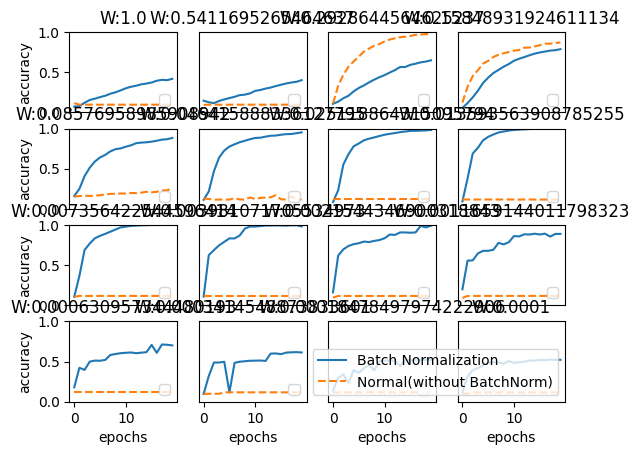

In [34]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()

epoch:0, train acc:0.12333333333333334, test acc:0.125
epoch:1, train acc:0.15666666666666668, test acc:0.1383
epoch:2, train acc:0.18333333333333332, test acc:0.1621
epoch:3, train acc:0.22333333333333333, test acc:0.1778
epoch:4, train acc:0.23, test acc:0.1874
epoch:5, train acc:0.2733333333333333, test acc:0.1985
epoch:6, train acc:0.24666666666666667, test acc:0.1947
epoch:7, train acc:0.28, test acc:0.2054
epoch:8, train acc:0.30333333333333334, test acc:0.2177
epoch:9, train acc:0.3433333333333333, test acc:0.2285
epoch:10, train acc:0.33666666666666667, test acc:0.2343
epoch:11, train acc:0.36666666666666664, test acc:0.2481
epoch:12, train acc:0.38666666666666666, test acc:0.262
epoch:13, train acc:0.4066666666666667, test acc:0.2795
epoch:14, train acc:0.44333333333333336, test acc:0.2876
epoch:15, train acc:0.45666666666666667, test acc:0.3088
epoch:16, train acc:0.48, test acc:0.3268
epoch:17, train acc:0.49333333333333335, test acc:0.3523
epoch:18, train acc:0.496666666666

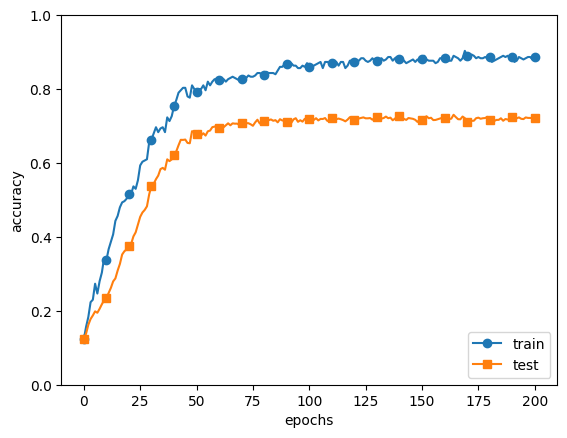

In [35]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [39]:
class Nesterov:

    """Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)"""
    # NAG는 모멘텀에서 한 단계 발전한 방법이다. (http://newsight.tistory.com/224)

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]

In [40]:
class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [41]:
class Trainer:
    """신경망 훈련을 대신 해주는 클래스
    """
    def __init__(self, network, x_train, t_train, x_test, t_test,
                 epochs=20, mini_batch_size=100,
                 optimizer='SGD', optimizer_param={'lr':0.01},
                 evaluate_sample_num_per_epoch=None, verbose=True):
        self.network = network
        self.verbose = verbose
        self.x_train = x_train
        self.t_train = t_train
        self.x_test = x_test
        self.t_test = t_test
        self.epochs = epochs
        self.batch_size = mini_batch_size
        self.evaluate_sample_num_per_epoch = evaluate_sample_num_per_epoch

        # optimzer
        optimizer_class_dict = {'sgd':SGD, 'momentum':Momentum, 'nesterov':Nesterov,
                                'adagrad':AdaGrad, 'rmsprpo':RMSprop, 'adam':Adam}
        self.optimizer = optimizer_class_dict[optimizer.lower()](**optimizer_param)

        self.train_size = x_train.shape[0]
        self.iter_per_epoch = max(self.train_size / mini_batch_size, 1)
        self.max_iter = int(epochs * self.iter_per_epoch)
        self.current_iter = 0
        self.current_epoch = 0

        self.train_loss_list = []
        self.train_acc_list = []
        self.test_acc_list = []

    def train_step(self):
        batch_mask = np.random.choice(self.train_size, self.batch_size)
        x_batch = self.x_train[batch_mask]
        t_batch = self.t_train[batch_mask]

        grads = self.network.gradient(x_batch, t_batch)
        self.optimizer.update(self.network.params, grads)

        loss = self.network.loss(x_batch, t_batch)
        self.train_loss_list.append(loss)
        if self.verbose: print("train loss:" + str(loss))

        if self.current_iter % self.iter_per_epoch == 0:
            self.current_epoch += 1

            x_train_sample, t_train_sample = self.x_train, self.t_train
            x_test_sample, t_test_sample = self.x_test, self.t_test
            if not self.evaluate_sample_num_per_epoch is None:
                t = self.evaluate_sample_num_per_epoch
                x_train_sample, t_train_sample = self.x_train[:t], self.t_train[:t]
                x_test_sample, t_test_sample = self.x_test[:t], self.t_test[:t]

            train_acc = self.network.accuracy(x_train_sample, t_train_sample)
            test_acc = self.network.accuracy(x_test_sample, t_test_sample)
            self.train_acc_list.append(train_acc)
            self.test_acc_list.append(test_acc)

            if self.verbose: print("=== epoch:" + str(self.current_epoch) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc) + " ===")
        self.current_iter += 1

    def train(self):
        for i in range(self.max_iter):
            self.train_step()

        test_acc = self.network.accuracy(self.x_test, self.t_test)

        if self.verbose:
            print("=============== Final Test Accuracy ===============")
            print("test acc:" + str(test_acc))


train loss:2.2968296910628485
=== epoch:1, train acc:0.1, test acc:0.1004 ===
train loss:2.309565632510126
train loss:2.2863138727098113
train loss:2.3078360148286015
=== epoch:2, train acc:0.1, test acc:0.102 ===
train loss:2.31334230047699
train loss:2.26345857697301
train loss:2.2908677612855097
=== epoch:3, train acc:0.1, test acc:0.1024 ===
train loss:2.3425835576481493
train loss:2.3148194785432303
train loss:2.330014568731873
=== epoch:4, train acc:0.1, test acc:0.1037 ===
train loss:2.308377162149275
train loss:2.2984285310883044
train loss:2.2985027780889347
=== epoch:5, train acc:0.10333333333333333, test acc:0.1048 ===
train loss:2.3142955534222716
train loss:2.3002164696459686
train loss:2.2941273132368316
=== epoch:6, train acc:0.10666666666666667, test acc:0.1064 ===
train loss:2.28118272680863
train loss:2.267343693434579
train loss:2.31056995025061
=== epoch:7, train acc:0.11, test acc:0.1086 ===
train loss:2.2890478663524405
train loss:2.2948977156869668
train loss:2.2

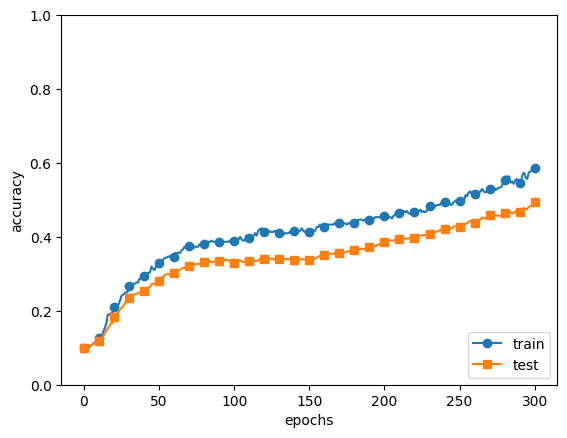

In [42]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [43]:
def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.

    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블

    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

val acc:0.78 | lr:0.008419578659124244, weight decay:5.1363984601993354e-08
val acc:0.11 | lr:9.139026322362825e-06, weight decay:6.693144626857888e-05
val acc:0.09 | lr:2.7934293344624437e-05, weight decay:6.470752783575875e-07
val acc:0.12 | lr:1.8457068668155613e-06, weight decay:1.2179036082860765e-06
val acc:0.1 | lr:6.4923741750593735e-06, weight decay:1.4077871428101333e-07
val acc:0.12 | lr:0.0008572730018936099, weight decay:2.3774232064697936e-05
val acc:0.11 | lr:5.1310245901635644e-05, weight decay:4.1701460855961445e-05
val acc:0.11 | lr:0.00012259044820343842, weight decay:2.054188566446332e-07
val acc:0.2 | lr:8.204008426645164e-06, weight decay:1.7106028642475848e-06
val acc:0.13 | lr:0.00029502994144670584, weight decay:1.0013330490975695e-07
val acc:0.06 | lr:2.8770335139987552e-06, weight decay:3.76959944636819e-07
val acc:0.12 | lr:0.0014733840486799382, weight decay:5.472372349411315e-07
val acc:0.07 | lr:7.5323702563244515e-06, weight decay:1.9282607519556237e-06


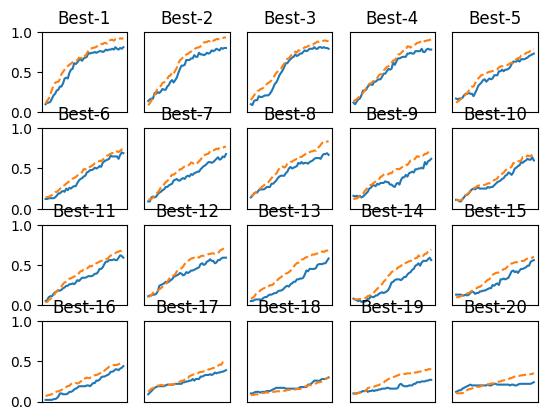

In [44]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()